# Avance II
# Data Science I : Fundamentos para la Ciencia de Datos
### Fecha: 27/02/2024

## Objetivos:

### Visualizaciones en Python

1. Seleccionar uno de los datasets anterioriores *“Elección de Potenciales Datasets e importe con la librería Pandas”*.
2. Realizar un abstract (250/500 palabras) de acuerdo al dataset elegido.
3. Establecer las preguntas e hipótesis de interés sobre el dataset elegido.
    - Generar al menos dos preguntas y/o hipotesis.
4. Realizar gráficos con Matplotlib y con Seaborn.
    - 3 visualizaciones distintas con Matplotlib: 1 Univariado, 1 Bivariado, 1 libre elección.
    - 3 visualizaciones distintas con Seaborn: 1 Univariado, 1 Bivariado, 1 libre elección.
    - Generar una interpretación de los gráficos.
    - Generar al menos un chart (radar o caras) que trabaje con tres variables con vinculación lógica.
    - Debe usarse al menos un parametro adicional (grid, hue, etc) que enriquezca la legibilidad de los charts.
    - Cada gráfico será interpretado con el fin de obtener insights relevantes que permitan dar respuesta a la pregunta problema.

# 1. Selección Dataset: `loan_data.csv`


### Importación

In [8]:
# Importación pandas para manipulación y estructuración de datos
import pandas as pd

### Asignación

In [9]:
# Importamos y asignamos el dataset a la variable df
df = pd.read_csv("../Data/loan_data.csv")

### Pre visualización

In [10]:
# Imprimimos solo las primeras dos filas del dataset para tener una vista previa de la estructura de nuestros datos
df.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


### Verificamos si existen datos nulos

In [11]:
df.isnull()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Contamos los datos nulos

In [12]:
contar_datos_nulos = df.isnull().sum()

In [13]:
contar_datos_nulos

Unnamed: 0           0
status               0
loan_amnt            0
term                 0
annual_inc           0
dti                  0
payment_inc_ratio    0
revol_bal            0
revol_util           0
purpose              0
home_ownership       0
delinq_2yrs_zero     0
pub_rec_zero         0
open_acc             0
grade                0
outcome              0
emp_length           0
purpose_             0
home_                0
emp_len_             0
borrower_score       0
dtype: int64

### Renombramiento

In [14]:
# Realizamos un mapeo de los nombres del dataset y lo pasamos a un diaccionario con los nombre nuevos que asignaresmo
nuevos_nombres = {
    'Unnamed: 0': 'Sin_nombre',
    'status': 'Estado',
    'loan_amnt': 'Monto_prestamo',
    'term': 'Plazo',
    'annual_inc': 'Ingreso_anual',
    'dti': 'DTI',
    'payment_inc_ratio': 'Proporcion_ingresos_pago',
    'revol_bal': 'Saldo_revolvente',
    'revol_util': 'Utilizacion_revolvente',
    'purpose': 'Proposito',
    'delinq_2yrs_zero': 'Morosidad_2años_cero',
    'pub_rec_zero': 'Reg_publico_cero',
    'open_acc': 'Cuentas_abiertas',
    'grade': 'Grado',
    'outcome': 'Resultado',
    'emp_length': 'Antiguedad_laboral',
    'purpose_': 'Proposito_',
    'home_': 'Hogar_',
    'emp_len_': 'Ant_laboral_',
    'borrower_score': 'Puntuacion_prestatario'
}

In [15]:
# Renombramos los columnas pasandoleel diccionario de nuevos_nombres
df = df.rename(columns=nuevos_nombres)

In [16]:
# Imprimimos los primeras dos filas solo para verificar que se a realizado correctamente la asignación de nuevos_nombres
df.head(2)

,Sin_nombre,Estado,Monto_prestamo,Plazo,Ingreso_anual,DTI,Proporcion_ingresos_pago,Saldo_revolvente,Utilizacion_revolvente,Proposito,...,Morosidad_2años_cero,Reg_publico_cero,Cuentas_abiertas,Grado,Resultado,Antiguedad_laboral,Proposito_,Hogar_,Ant_laboral_,Puntuacion_prestatario
0,1,Charged Off,2500,60 months,30000,1.00,2.3932,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.5717,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80


### Reemplazar los valores infinitos con NaN 

In [247]:
# df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [248]:
# Reemplazar valores infinitos con un valor específico, por ejemplo, 0
# df.replace([np.inf, -np.inf], 0, inplace=True)

In [249]:
# print(df.isna().sum())

# 2. Abstract

El conjunto de datos de préstamos número 2 proporciona información integral sobre las solicitudes y aprobaciones de préstamos, abarcando diversos aspectos de la demografía de los prestatarios, atributos financieros y características del préstamo. Este conjunto de datos ofrece información sobre el panorama crediticio, facilitando el análisis y la toma de decisiones para instituciones financieras e investigadores.

El conjunto de datos de préstamos número 2 incluye información detallada como la demografía de los prestatarios (por ejemplo, edad, género, estado civil), atributos financieros (por ejemplo, ingresos, relación deuda-ingresos), detalles del préstamo (por ejemplo, monto del préstamo, tasa de interés, plazo del préstamo) y detalles de la solicitud (por ejemplo, propósito del préstamo, estado laboral). Además, puede contener datos relacionados con el historial crediticio, el rendimiento del préstamo y otras variables relevantes cruciales para evaluar el riesgo crediticio y las probabilidades de aprobación del préstamo.

Analizar este conjunto de datos permite diversos objetivos de investigación:

1. **Evaluación del Riesgo Crediticio**: Uno de los objetivos principales es evaluar el riesgo crediticio examinando la relación entre las características de los prestatarios, los atributos financieros y el rendimiento del préstamo. Esto implica identificar factores asociados con incumplimientos o retrasos en los pagos de los préstamos, ayudando así a los prestamistas a tomar decisiones informadas sobre la aprobación de préstamos y las estrategias de gestión del riesgo.

2. **Segmentación de Mercado**: El conjunto de datos facilita el análisis de segmentación de mercado al identificar patrones y tendencias entre diferentes segmentos de prestatarios. Esto incluye la segmentación de prestatarios según la demografía, perfiles financieros y preferencias de préstamo, lo que permite a las instituciones financieras adaptar sus estrategias de comercialización y productos financieros para satisfacer las necesidades específicas de cada segmento.

# 3. Preguntas e Hipótesis

1. **¿ Cuál es el rango de montos de préstamos más comunmente solicitados ?**
   - Hipotesis: Se espera que la frecuencia de solicitud de préstamos sea mayor en los montos de préstamos más bajos en comparación con los montos más altos, lo que sugiere que los prestatarios tienden a solicitar montos más modestos en lugar de montos más elevados.

2. **¿ Las personas con mayor antigüedad laboral tienen un mayor monto de préstamos ?**

   - Hipótesis: Esta pregunta es relevante para comprender cómo la antigüedad laboral puede influir en la cantidad de préstamos que las personas solicitan. La hipótesis planteada es coherente y sugiere una relación positiva entre la antigüedad laboral y el monto del préstamo, lo cual tiene sentido intuitivo.


3. ¿Existe una relación entre el propósito del préstamo y la probabilidad de incumplimiento?

   - Hipótesis: Esta pregunta aborda la relación entre el propósito del préstamo y el riesgo crediticio asociado. La hipótesis propuesta es adecuada, ya que diferentes propósitos de préstamo podrían estar asociados con diferentes niveles de riesgo de incumplimiento. Será interesante explorar cómo diferentes categorías de propósito de préstamo se relacionan con las tasas de incumplimiento.
  

# **4. Visualizaciones**

### Importación de librerias

In [17]:
# Importación Numpy para operaciones numéricas (se utilizara en caso de ser necesaria)
import numpy as np

# Importación Matplotlib para la graficación de los datos
import matplotlib.pyplot as plt

# Importación Seaborn para la graficación más avanzada de datos
import seaborn as sns

In [18]:
# Para verificar los estilos disponibles en matplotlib
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [19]:
# Visualizamos las columnas
df.columns

Index(['Sin_nombre', 'Estado', 'Monto_prestamo', 'Plazo', 'Ingreso_anual',
       'DTI', 'Proporcion_ingresos_pago', 'Saldo_revolvente',
       'Utilizacion_revolvente', 'Proposito', 'home_ownership',
       'Morosidad_2años_cero', 'Reg_publico_cero', 'Cuentas_abiertas', 'Grado',
       'Resultado', 'Antiguedad_laboral', 'Proposito_', 'Hogar_',
       'Ant_laboral_', 'Puntuacion_prestatario'],
      dtype='object')

### Clasificación de cada variable:

- Estado: Categórica, nominal.

- Monto_prestamo: Cuantitativa, continua.

- Plazo: Categórica, ordinal.

- Ingreso_anual: Cuantitativa, continua.

- DTI: Cuantitativa, continua.

- Proporcion_ingresos_pago: Cuantitativa, continua.

- Saldo_revolvente: Cuantitativa, continua.

- Utilizacion_revolvente: Cuantitativa, continua.

- Propósito: Categórica, nominal.

- Morosidad_2años_cero: Categórica, nominal.

- Reg_publico_cero: Categórica, nominal.

- Cuentas_abiertas: Cuantitativa, discreta.

- Grado: Categórica, ordinal.

- Resultado: Categórica, nominal.

- Antiguedad_laboral: Cuantitativa, discreta.

- Propósito_: No está claro sin más información.

- Hogar_: Categórica, nominal.

- Ant_laboral_: No está claro sin más información.

- Puntuacion_prestatario: Cuantitativa, continua.

# Gráficos Univariados

## Histograma

- Utilizamos la variable cuantitativa `Monto_prestamo`, para gráficar la distribución de la frecuencia de nuestra variable que representa los montos de los prestamos.

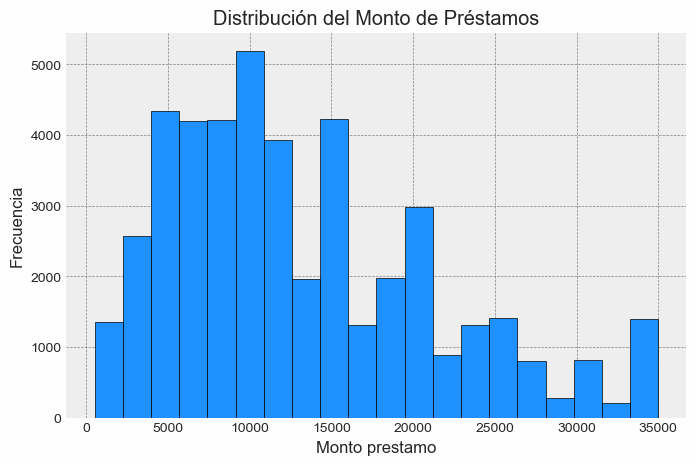

In [152]:
# Definimos el lienzo y sus medidas
fig, ax = plt.subplots(figsize=(8, 5))

# Creamos el historgrama llamando el método hist y pasandole la variable Monto_prestamo y los bins "intervalos"
ax.hist(df["Monto_prestamo"], bins=20, color="dodgerblue", edgecolor="black")
# plt.style.use('dark_background')
plt.style.use('bmh')
# Definimos el titulo del gráfico
ax.set_title("Distribución del Monto de Préstamos")
# Definimos el titulo del eje x
ax.set_xlabel("Monto prestamo")
# Definimos el titulo del eje y
ax.set_ylabel("Frecuencia")

# Definimos las grillas del gráfico
ax.grid(color="grey")

### Elección del Gráfico:

  - Se optó por utilizar un histograma debido a su capacidad para realizar un análisis univariado, lo que permite explorar una variable única, en este caso, el monto de los préstamos solicitados. El histograma representa la frecuencia, es decir, la cantidad de préstamos, en relación con diferentes intervalos de monto de préstamo.

### Interpretación:

  - El histograma muestra la distribución de la frecuencia de solicitudes de préstamos en función de los montos de préstamo. De acuerdo con nuestra hipótesis, esperábamos observar una mayor frecuencia de solicitudes en los montos de préstamos más bajos. Los resultados del análisis respaldan esta expectativa, ya que se observa una cantidad significativamente mayor de préstamos en los intervalos de montos más bajos en comparación con los montos más altos. Por ejemplo, en el intervalo de montos entre 0 y 5000, la cantidad de préstamos oscila entre 1000 y 3000. Sin embargo, a medida que los montos de préstamo aumentan, la frecuencia de solicitudes disminuye gradualmente, lo que sugiere una preferencia por montos de préstamo más modestos entre los prestatarios.

# Boxplot
- Utilizamos la variable cuantitativa Monto_prestamo.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


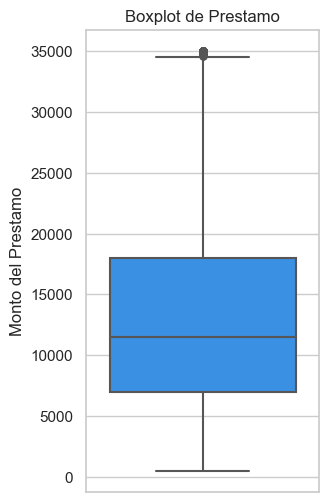

In [270]:
plt.figure(figsize=(3, 6))
sns.boxplot(y =df["Monto_prestamo"], color = "dodgerblue", flierprops = {"marker" : "o"})
# Dfin
plt.title("Boxplot de Prestamo")
plt.ylabel("Monto del Prestamo")
# Imprimimos el gráfico
plt.show()

### Elección del Gráfico:

  - Se optó por utilizar un histograma debido a su capacidad para realizar un análisis univariado, lo que permite explorar una variable única, en este caso, el monto de los préstamos solicitados. El histograma representa la frecuencia, es decir, la cantidad de préstamos, en relación con diferentes intervalos de monto de préstamo.

### Interpretación:

  - El histograma muestra la distribución de la frecuencia de solicitudes de préstamos en función de los montos de préstamo. De acuerdo con nuestra hipótesis, esperábamos observar una mayor frecuencia de solicitudes en los montos de préstamos más bajos. Los resultados del análisis respaldan esta expectativa, ya que se observa una cantidad significativamente mayor de préstamos en los intervalos de montos más bajos en comparación con los montos más altos. Por ejemplo, en el intervalo de montos entre 0 y 5000, la cantidad de préstamos oscila entre 1000 y 3000. Sin embargo, a medida que los montos de préstamo aumentan, la frecuencia de solicitudes disminuye gradualmente, lo que sugiere una preferencia por montos de préstamo más modestos entre los prestatarios.

-----

# Gráficos Bivariados

# Gráfico de barras

- Bivariado ya que muestra la relacion entres dos variables una cualitativa `Proposito` y otra cuantitativa `Monto_prestamo`.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


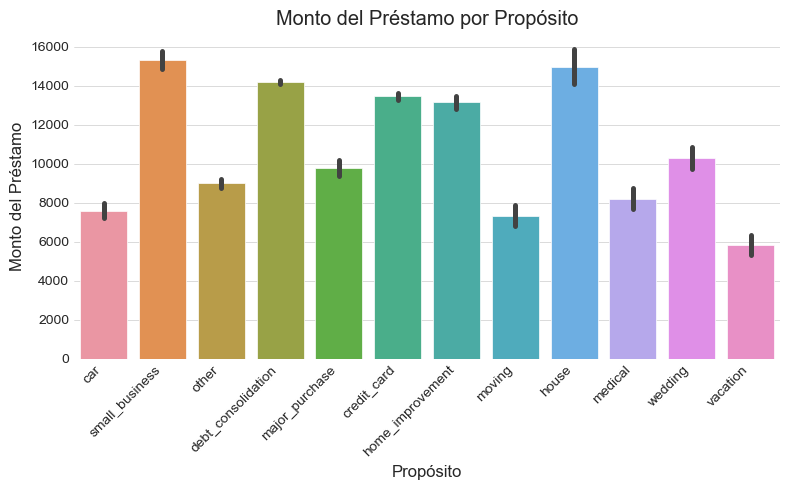

In [243]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Proposito"], y=df["Monto_prestamo"], data=df)

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Añadir títulos y etiquetas
plt.title("Monto del Préstamo por Propósito")
plt.xlabel("Propósito")
plt.ylabel("Monto del Préstamo")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- En el gráfico podemos visualizar que el 95% de los datos esta por sobre un monto de 5000 y bajo un monto de 20000.
- La mediana esta entre los 10000 y los 15000 y la media que se ve repreentada con la linea discontinua es la representación del promedio de los datos es decir esta entre los 10000 y los 15000 cercana a la mediana.
- Se obsrvan outliers en prestamos por sobre los 35000.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


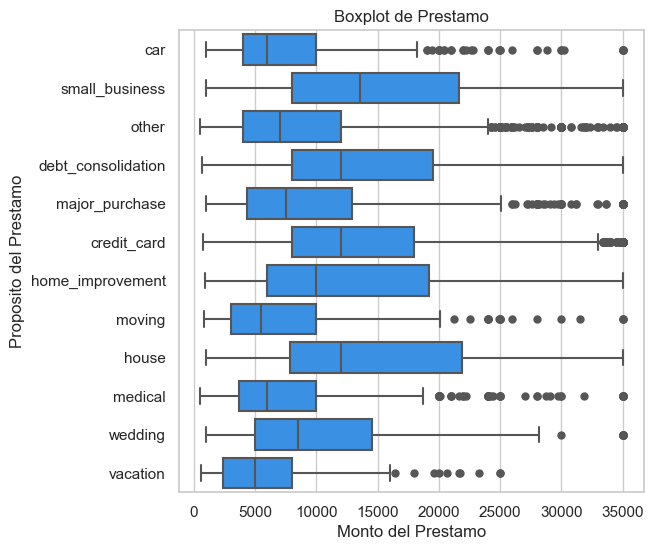

In [271]:
plt.figure(figsize=(6, 6))
sns.boxplot(x =df["Monto_prestamo"], y=df["Proposito"], color = "dodgerblue", flierprops = {"marker" : "o"})
# Dfin
plt.title("Boxplot de Prestamo")
plt.xlabel("Monto del Prestamo")
plt.ylabel("Proposito del Prestamo")
# Imprimimos el gráfico
plt.show()

## Dispersión

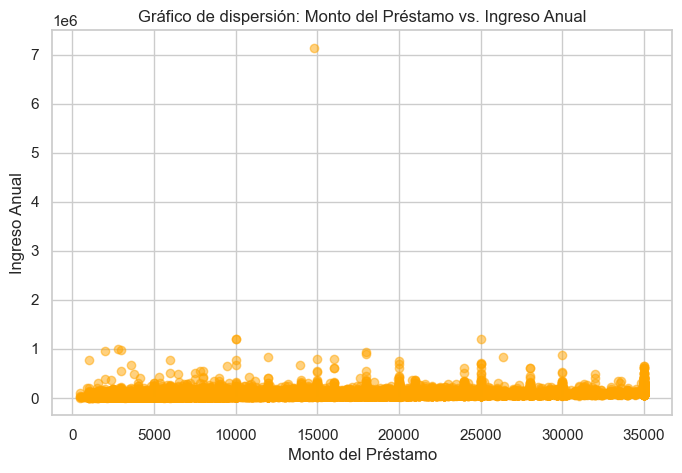

In [256]:
monto_prestamo = df["Monto_prestamo"]
ingreso_anual = df["Ingreso_anual"]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(monto_prestamo, ingreso_anual, color='orange', alpha=0.5)

# Añadir título y etiquetas
plt.title('Gráfico de dispersión: Monto del Préstamo vs. Ingreso Anual')
plt.xlabel('Monto del Préstamo')
plt.ylabel('Ingreso Anual')

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Elección del Gráfico:

  - Se optó por utilizar un histograma debido a su capacidad para realizar un análisis univariado, lo que permite explorar una variable única, en este caso, el monto de los préstamos solicitados. El histograma representa la frecuencia, es decir, la cantidad de préstamos, en relación con diferentes intervalos de monto de préstamo.

### Interpretación:

  - El histograma muestra la distribución de la frecuencia de solicitudes de préstamos en función de los montos de préstamo. De acuerdo con nuestra hipótesis, esperábamos observar una mayor frecuencia de solicitudes en los montos de préstamos más bajos. Los resultados del análisis respaldan esta expectativa, ya que se observa una cantidad significativamente mayor de préstamos en los intervalos de montos más bajos en comparación con los montos más altos. Por ejemplo, en el intervalo de montos entre 0 y 5000, la cantidad de préstamos oscila entre 1000 y 3000. Sin embargo, a medida que los montos de préstamo aumentan, la frecuencia de solicitudes disminuye gradualmente, lo que sugiere una preferencia por montos de préstamo más modestos entre los prestatarios.

# **Libre elección**

# Histograma por grupos
- Utilizamos un histograma de grupos para una variable cuantitativa en el eje x `Monto_prestamo` y una variable cualitativa en el eje y `Estado`.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

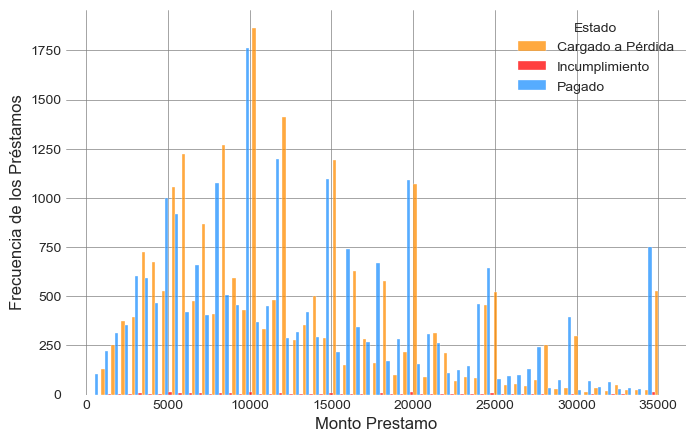

In [241]:
# Definimos las variables a ustilizar en el gráfico
monto_credito = df["Monto_prestamo"]
proposito = df["Estado"]

# Definimos el gráfico con un tamaño de 10 * 5
fig, ax = plt.subplots(figsize=(8, 5))
# plt.style.use('dark_background')
# Definimos un diccionario con los colores a utilizar en relación con el estado del prestamo
colores = {'Charged Off': 'dodgerblue', 'Default':'red', 'Fully Paid': 'darkorange'}

# Seleccionamos el histograma de seaborn, pasamos las variables de monto como los propositos como grupos
# Utilizamos ocmo argumento dodge que impide que las barras se solapen
# Utilizamos el argumento palette para personalizar los colores por grupo pasandole el dic colores
sns.histplot(x = monto_credito, hue = proposito, multiple = "dodge", palette = colores)

# Cambiaamos los nombres de las estiquetas de los grupos con labels
ax.legend(title="Estado", labels=["Cargado a Pérdida", "Incumplimiento", "Pagado"])
plt.ylabel("Frecuencia de los Préstamos")
plt.xlabel("Monto Prestamo")
plt.grid(color="grey")
# Imprimimos el gráfico
plt.show()

- Los montos de los prestamos que van desde los 10000 hasta los 15000 podemos visualizar que estados se encuentran con una carga a perdida, es decir es mas probable que los creditos no sean pagados.
- Se puede observar que los prestamos en estado de incumplimento son los que se encuentran con menor frecuencia pero a su vez se visualiza que estan presenten en la mayoria de los rangos de prestamos, se ven mas visibles desde los prestamos mayores de 5000 hasat los 35000, su frecuecnia es menor a los 100 prestamos.
- La mayor carga de perdida se ve reflejada en frestamos que van desde los 5000 hasta los 20000.


# Gráfico de Barras

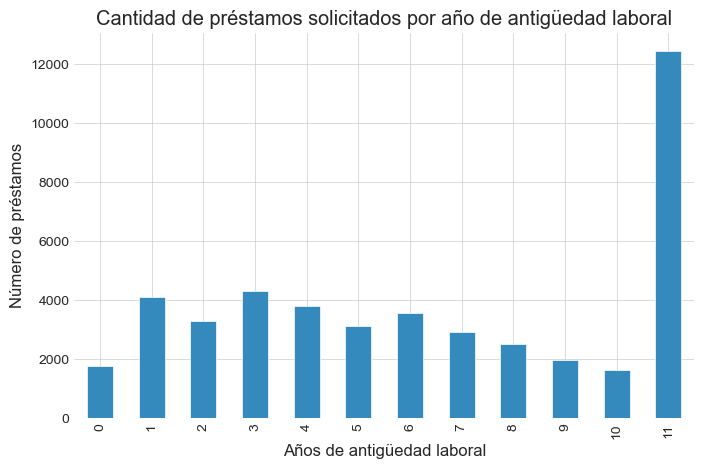

In [240]:
# Agrupar los datos por 'Antiguedad_laboral' y contar el número de préstamos en cada año
grouped_data = df.groupby('Antiguedad_laboral').size()

# Crear el gráfico de barras
grouped_data.plot(kind='bar', figsize=(8, 5))

# Personalizar el gráfico
plt.xlabel('Años de antigüedad laboral')
plt.ylabel('Número de préstamos')
plt.title('Cantidad de préstamos solicitados por año de antigüedad laboral')


# Mostrar el gráfico
plt.show()

### Elección del Gráfico:

  - Se optó por utilizar un histograma debido a su capacidad para realizar un análisis univariado, lo que permite explorar una variable única, en este caso, el monto de los préstamos solicitados. El histograma representa la frecuencia, es decir, la cantidad de préstamos, en relación con diferentes intervalos de monto de préstamo.

### Interpretación:

  - El histograma muestra la distribución de la frecuencia de solicitudes de préstamos en función de los montos de préstamo. De acuerdo con nuestra hipótesis, esperábamos observar una mayor frecuencia de solicitudes en los montos de préstamos más bajos. Los resultados del análisis respaldan esta expectativa, ya que se observa una cantidad significativamente mayor de préstamos en los intervalos de montos más bajos en comparación con los montos más altos. Por ejemplo, en el intervalo de montos entre 0 y 5000, la cantidad de préstamos oscila entre 1000 y 3000. Sin embargo, a medida que los montos de préstamo aumentan, la frecuencia de solicitudes disminuye gradualmente, lo que sugiere una preferencia por montos de préstamo más modestos entre los prestatarios.

-----

# Gráfico de radar o de caras

- Gráfico que trabaje con tres variables con vinculación lógica, podrías considerar crear un gráfico de radar o de caras que represente la satisfacción con la vida, la esperanza de vida y el nivel de ingresos para diferentes países, lo que te permitirá visualizar de manera integrada múltiples dimensiones del bienestar y la calidad de vida en cada país.

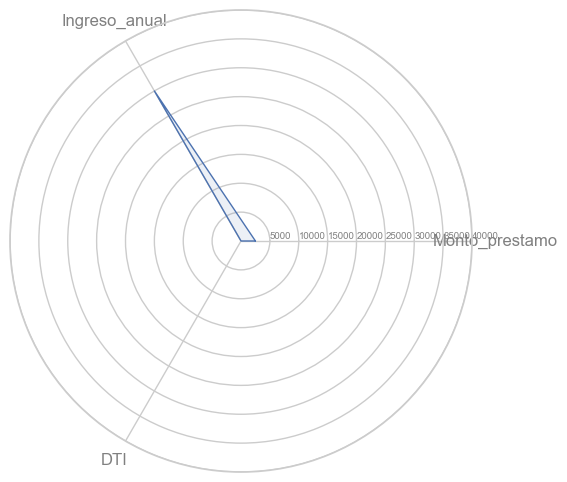

In [252]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura y un eje polar
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

# Definir los nombres de las variables y sus valores
categorias = ['Monto_prestamo', 'Ingreso_anual', 'DTI']  # Nombres de las variables en el gráfico de radar
valores = df.loc[0, ['Monto_prestamo', 'Ingreso_anual', 'DTI']].values.tolist()  # Obtener los valores de la 
#primera fila del DataFrame para las variables
valores += valores[:1]  # Añadir el primer valor al final para cerrar el gráfico

# Definir el número de variables y el ángulo para cada una
num_vars = len(categorias)  # Número de variables en el gráfico
angles = [n / float(num_vars) * 2 * 3.14159 for n in range(num_vars)]  # Ángulo para cada variable
angles += angles[:1]  # Repetir el primer ángulo al final para cerrar el gráfico

# Configurar el eje radial
plt.xticks(angles[:-1], categorias, color='grey', size=12)  # Etiquetas de las variables en el eje radial
ax.set_rlabel_position(0)  # Posición de las etiquetas radiales
plt.yticks(color='grey', size=7)  # Configuración de las marcas en el eje radial
plt.ylim(0, max(valores) + 10000)  # Límites del eje radial

# Dibujar las líneas del radar
ax.plot(angles, valores, linewidth=1, linestyle='solid')  # Dibujar las líneas que conectan los valores

# Rellenar el área bajo las líneas del radar
ax.fill(angles, valores, 'b', alpha=0.1)  # Rellenar el área bajo las líneas con un color azul claro y una opacidad de 0.1

# Mostrar el gráfico
plt.show()  # Mostrar el gráfico de radar
